In [6]:
import pickle
import argparse
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob

from main import main

## Run Iterated Learning Base Experiments

In [2]:
seeds = [41, 42, 43, 44, 45]

metrics = {}
for s in seeds:
    metrics[s] = main(['--seed', str(s)])

0/1000 Iterations: val loss: 3.329936981201172, val accuracy: 0.1671549528837204
200/1000 Iterations: val loss: 3.172307777404785, val accuracy: 0.20079104900360106
400/1000 Iterations: val loss: 3.172224760055542, val accuracy: 0.20003169178962707
600/1000 Iterations: val loss: 3.1723280906677247, val accuracy: 0.19989918172359467
800/1000 Iterations: val loss: 3.1728227615356444, val accuracy: 0.19977760910987855
1000/1000 Iterations: val loss: 3.1826595783233644, val accuracy: 0.19394877552986145
0/1000 Iterations: val loss: 3.327152681350708, val accuracy: 0.2121759235858917
200/1000 Iterations: val loss: 2.6439464569091795, val accuracy: 0.7538227200508117
400/1000 Iterations: val loss: 2.633528137207031, val accuracy: 0.7588896155357361
600/1000 Iterations: val loss: 2.632752561569214, val accuracy: 0.7588896155357361
800/1000 Iterations: val loss: 2.632535457611084, val accuracy: 0.7588896155357361
1000/1000 Iterations: val loss: 2.6324291706085203, val accuracy: 0.7588896155357

In [32]:
metrics[42][0]

{'validation_loss': {0: 3.3303696155548095,
  200: 3.1724128246307375,
  400: 3.1721965789794924,
  600: 3.172211027145386,
  800: 3.1724556922912597,
  1000: 3.1730531215667725},
 'validation_acc': {0: 0.1666666716337204,
  200: 0.19947167932987214,
  400: 0.19869014024734497,
  600: 0.19811515212059022,
  800: 0.19919397830963134,
  1000: 0.20084520876407624},
 'message_dist': 136,
 'jaccard_sim': 136,
 'num_unique_messages': 136,
 'test_loss': 3.1732797463734945,
 'test_acc': 0.19926921526590982,
 'topographic_similarity': 0.43918026155408113}

### Plot Results

In [28]:
def plot_metric(results, metric="test_loss", ylabel=None, show_error=True, 
                savefig=True, figname=None, title=None, ylim=None, a4_dims=(11.7, 8.27)):
    
    ci = 'sd' if show_error else None
    fig, ax = plt.subplots(figsize=a4_dims)
    
    generations = []
    values = []
    
    for s in list(results.keys()):    
        for g in sorted(list(results[s].keys())):
            generations.append(g)
            values.append(results[s][g][metric])
            
    values = np.array(values)
    iterations = np.array(generations)   
      
    d = {'Generations': iterations, metric: values}
    ax = sns.lineplot(ax=ax, x='Generations', y=metric, data=pd.DataFrame(data=d), ci=ci, palette='colorblind')
    if title is None:
        title = metric.replace('_', ' ').title()
    ax.set_title(title, fontsize=30)
    plt.show()

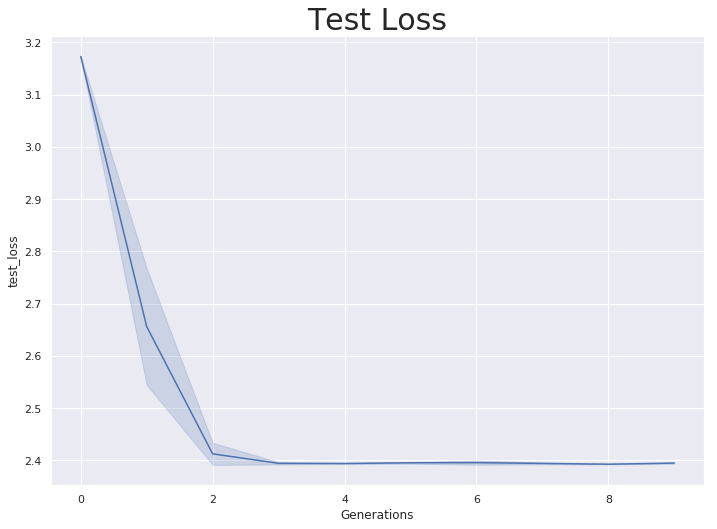

In [30]:
plot_metric(metrics)

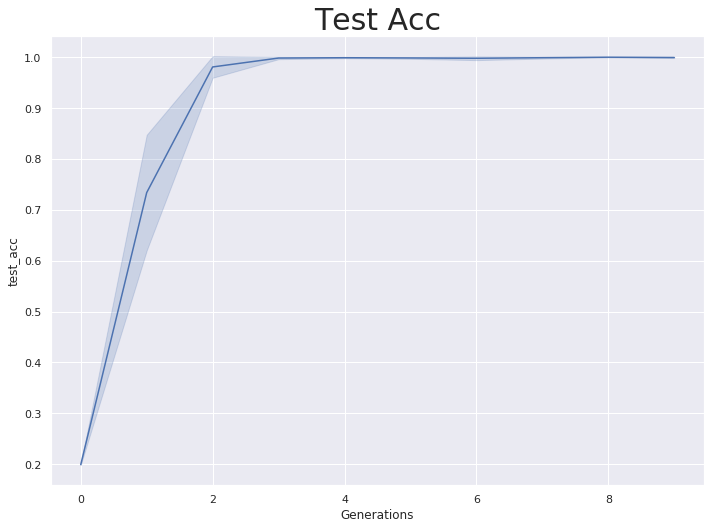

In [36]:
plot_metric(metrics, metric='test_acc')

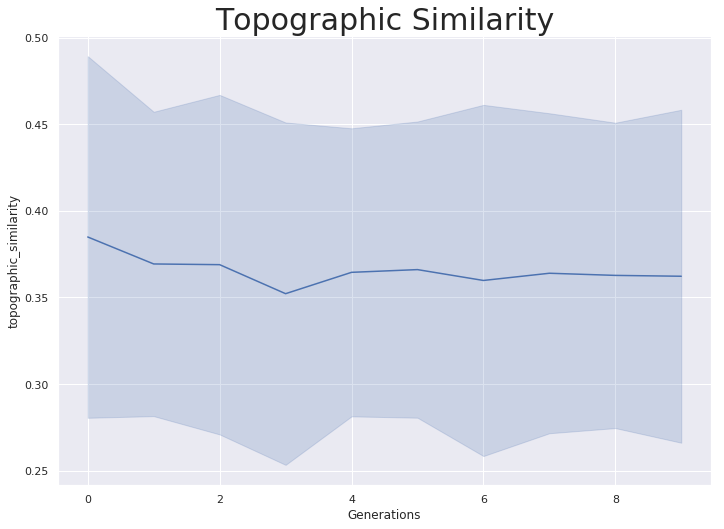

In [37]:
plot_metric(metrics, metric='topographic_similarity')

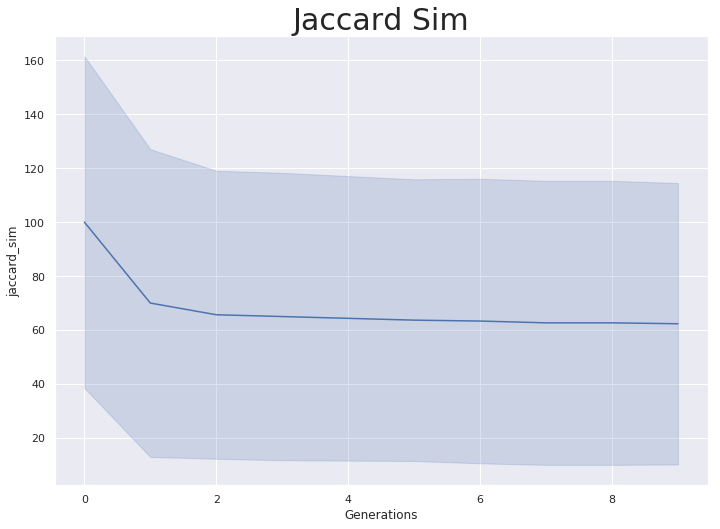

In [33]:
plot_metric(metrics, metric='jaccard_sim')

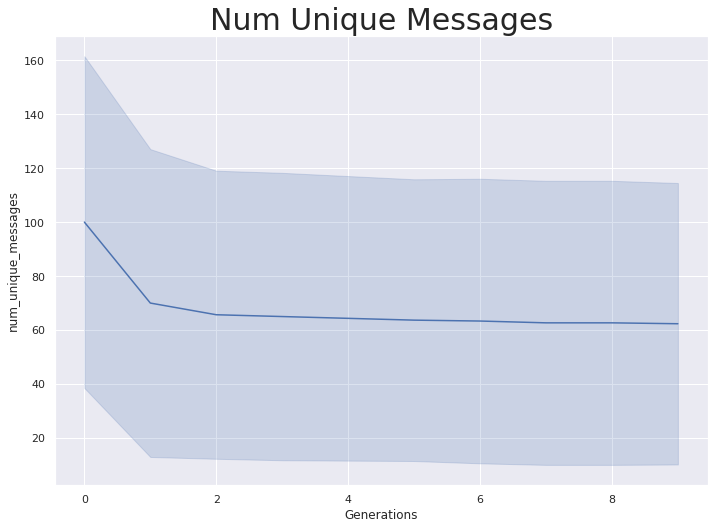

In [34]:
plot_metric(metrics, metric='num_unique_messages')

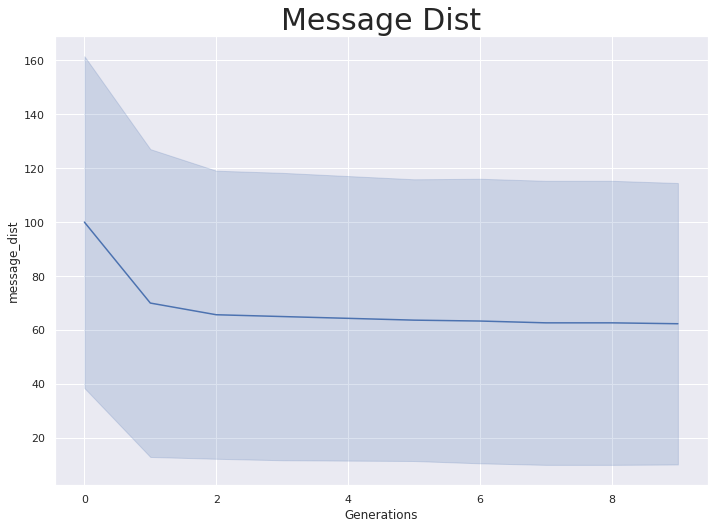

In [38]:
plot_metric(metrics, metric='message_dist')